In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [8]:
df = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\A_Z Handwritten Data.csv").astype('float32')

In [9]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


In [12]:
df.isnull().values.any()

False

In [13]:
x = df.drop('0',axis = 1)
y = df['0']

In [14]:
print(set(y))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0}


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [17]:
# no. of coloumns

In [18]:
x_train.shape[1]

784

In [19]:
# no. of rows

In [20]:
x_train.shape[0]

260715

In [21]:
x_train.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
# reshaping so as to get the data in image format

In [23]:
x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))
x_train.shape

(260715, 28, 28)

In [24]:
x_test.shape

(111735, 28, 28)

In [25]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [26]:
# converting labels to integers and assigning  alphabets

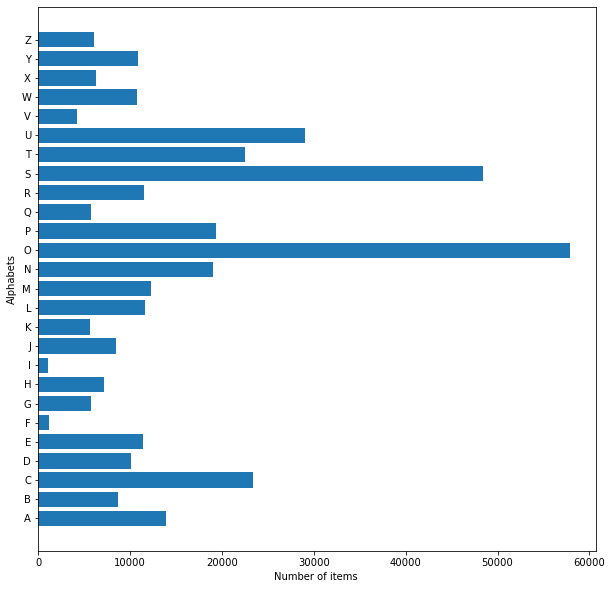

In [27]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of items ")
plt.ylabel("Alphabets")
plt.show()

In [28]:
x_shuffle = shuffle(x_train)

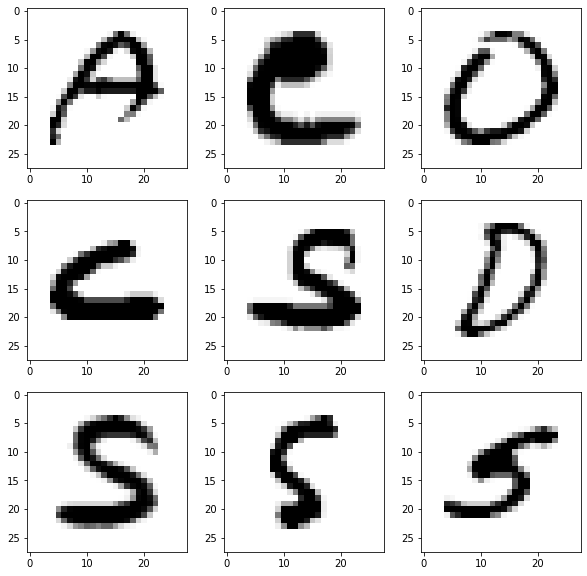

In [29]:

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(x_shuffle[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(x_shuffle[i], (28,28)), cmap="Greys")
plt.show()

In [30]:
x1_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
print("spane of training set: ", x1_train.shape)
x1_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("shape of test set: ", x1_test.shape)

spane of training set:  (260715, 28, 28, 1)
shape of test set:  (111735, 28, 28, 1)


In [31]:
y1_train = to_categorical(y_train, num_classes = 26, dtype='int')
print("shape of y train : ", y1_train.shape)
y1_test = to_categorical(y_test, num_classes = 26, dtype='int')
print("shape of  y test labels: ", y1_test.shape)

shape of y train :  (260715, 26)
shape of  y test labels:  (111735, 26)


In [32]:
## Model Creation

In [33]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [34]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x1_train, y1_train, epochs=1,  validation_data = (x1_test,y1_test))

8148/8148 [==============================] - 196s 24ms/step - loss: 0.1604 - accuracy: 0.9554 - val_loss: 0.0799 - val_accuracy: 0.9774


In [35]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [36]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9773660898208618]
The training accuracy is : [0.9553995728492737]
The validation loss is : [0.07994672656059265]
The training loss is : [0.16044972836971283]


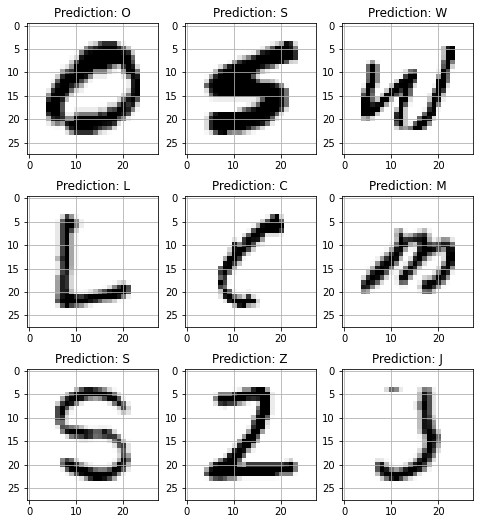

In [37]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(x1_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(y1_test[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [38]:
from tensorflow.keras.optimizers import Adamax

In [39]:
model.compile(optimizer = Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x1_train, y1_train, epochs=1,  validation_data = (x1_test,y1_test))

8148/8148 [==============================] - 182s 22ms/step - loss: 0.0391 - accuracy: 0.9892 - val_loss: 0.0395 - val_accuracy: 0.9897


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [41]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9896720051765442]
The training accuracy is : [0.989164412021637]
The validation loss is : [0.039510201662778854]
The training loss is : [0.039149437099695206]


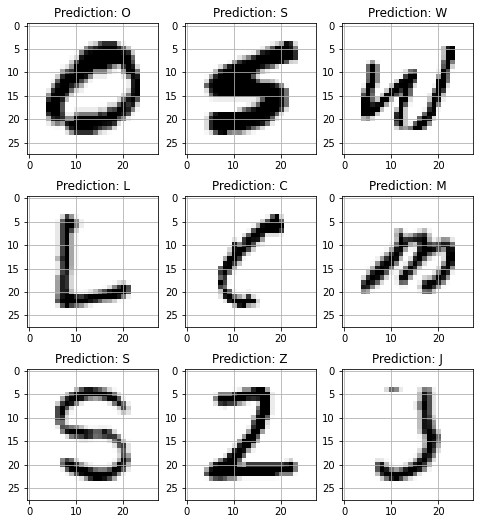

In [42]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(x1_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(y1_test[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [45]:
from tensorflow.keras.optimizers import Adagrad

In [46]:
model.compile(optimizer = Adagrad(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x1_train, y1_train, epochs=1,  validation_data = (x1_test,y1_test))

8148/8148 [==============================] - 196s 24ms/step - loss: 0.0234 - accuracy: 0.9936 - val_loss: 0.0355 - val_accuracy: 0.9908


In [47]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9907907247543335]
The training accuracy is : [0.9936175346374512]
The validation loss is : [0.035481810569763184]
The training loss is : [0.02338021621108055]


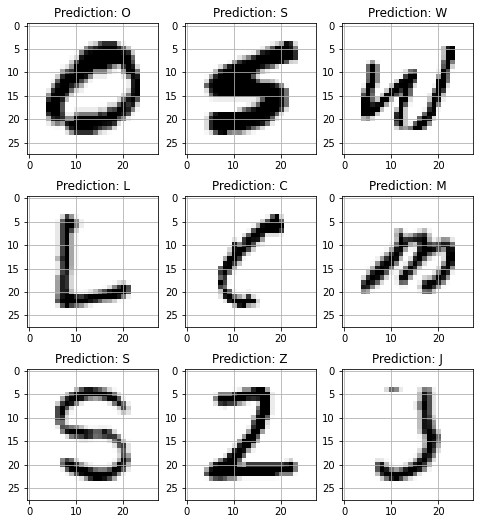

In [48]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(x1_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(y1_test[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [49]:
from tensorflow.keras.optimizers import SGD

In [51]:
model.compile(optimizer = SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x1_train, y1_train, epochs=1,  validation_data = (x1_test,y1_test))

8148/8148 [==============================] - 205s 25ms/step - loss: 0.0218 - accuracy: 0.9942 - val_loss: 0.0353 - val_accuracy: 0.9910


In [52]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9909607768058777]
The training accuracy is : [0.9941622018814087]
The validation loss is : [0.03528420627117157]
The training loss is : [0.021762803196907043]


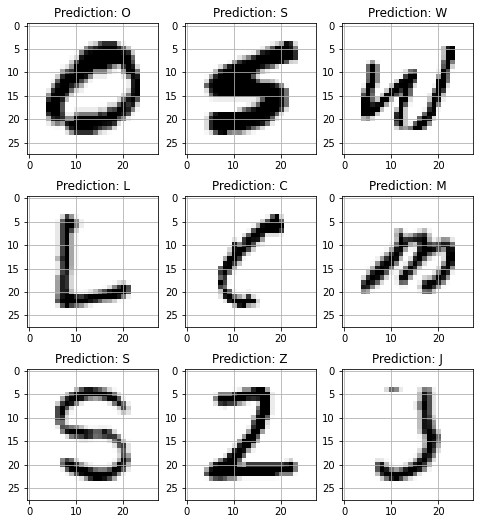

In [53]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(x1_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(y1_test[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()